# Problem statement:
This Project is having 2 Problems to solve.
This dataset has 14 columns and 1517 rows. we have 2 task one is to analyze the dataset and predict the city/region of observation and second is to predict the average price by developing a supervised machine learning model.

Part 1)In part 1 of this project we will predict the average price of the avocado by developing a supervised regression model.

Part 2)In part 2 of this project we will predict the city of observation of the avocado by developing a supervised Classification model.

In [157]:
# Import all the required liabrary
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE

#for part 2 of project
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [158]:
#Load Data Set
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [159]:
#check the shape of data
df.shape

(1517, 14)

Dataset is having 30 Rows and 17 columns.

In [160]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [161]:
#Check if any missing value present in data
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

This Data set is not having any missing values.

In [162]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [163]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [164]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

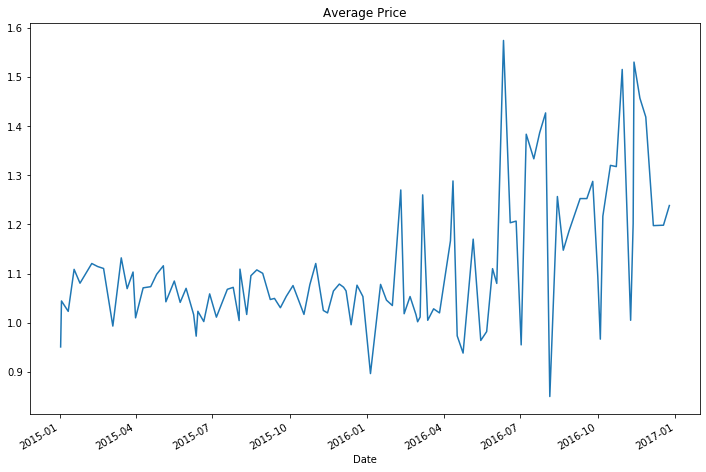

In [165]:
byDate = df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [166]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


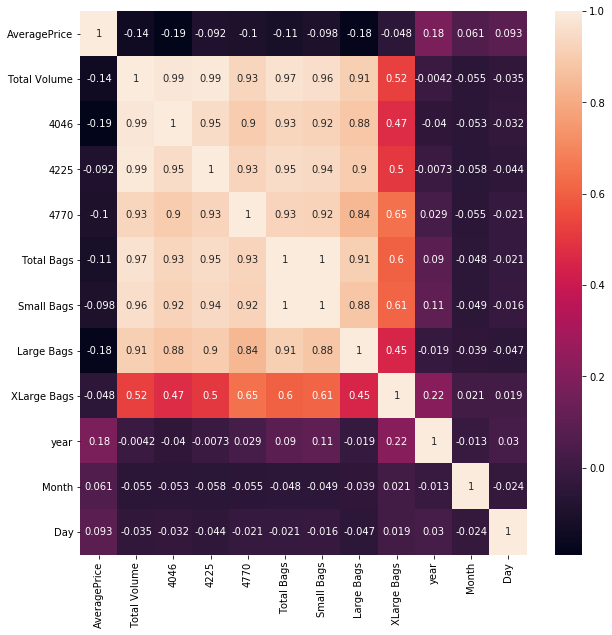

In [167]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

In [168]:
df['region'].nunique()

51

In [169]:
df['type'].nunique()

1

In [170]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Above we can see the description of baseball dataset.

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

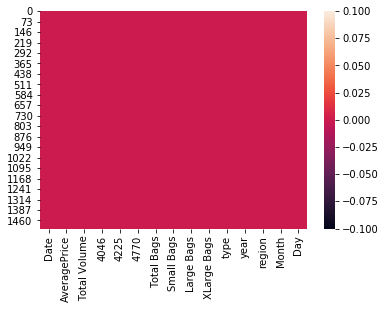

In [171]:
sns.heatmap(df.isnull())

AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
year            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Month           AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Day             AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

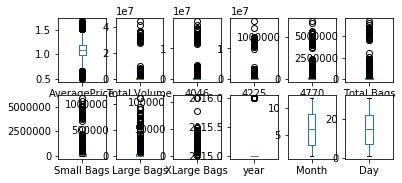

In [172]:
#check outliers
df.plot(kind='box',subplots=True,layout=(3,6))

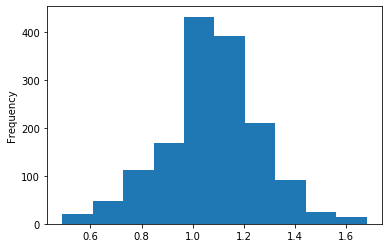

In [173]:
#Check skewness of data set
df['AveragePrice'].plot.hist()

data is quit bell shaped.

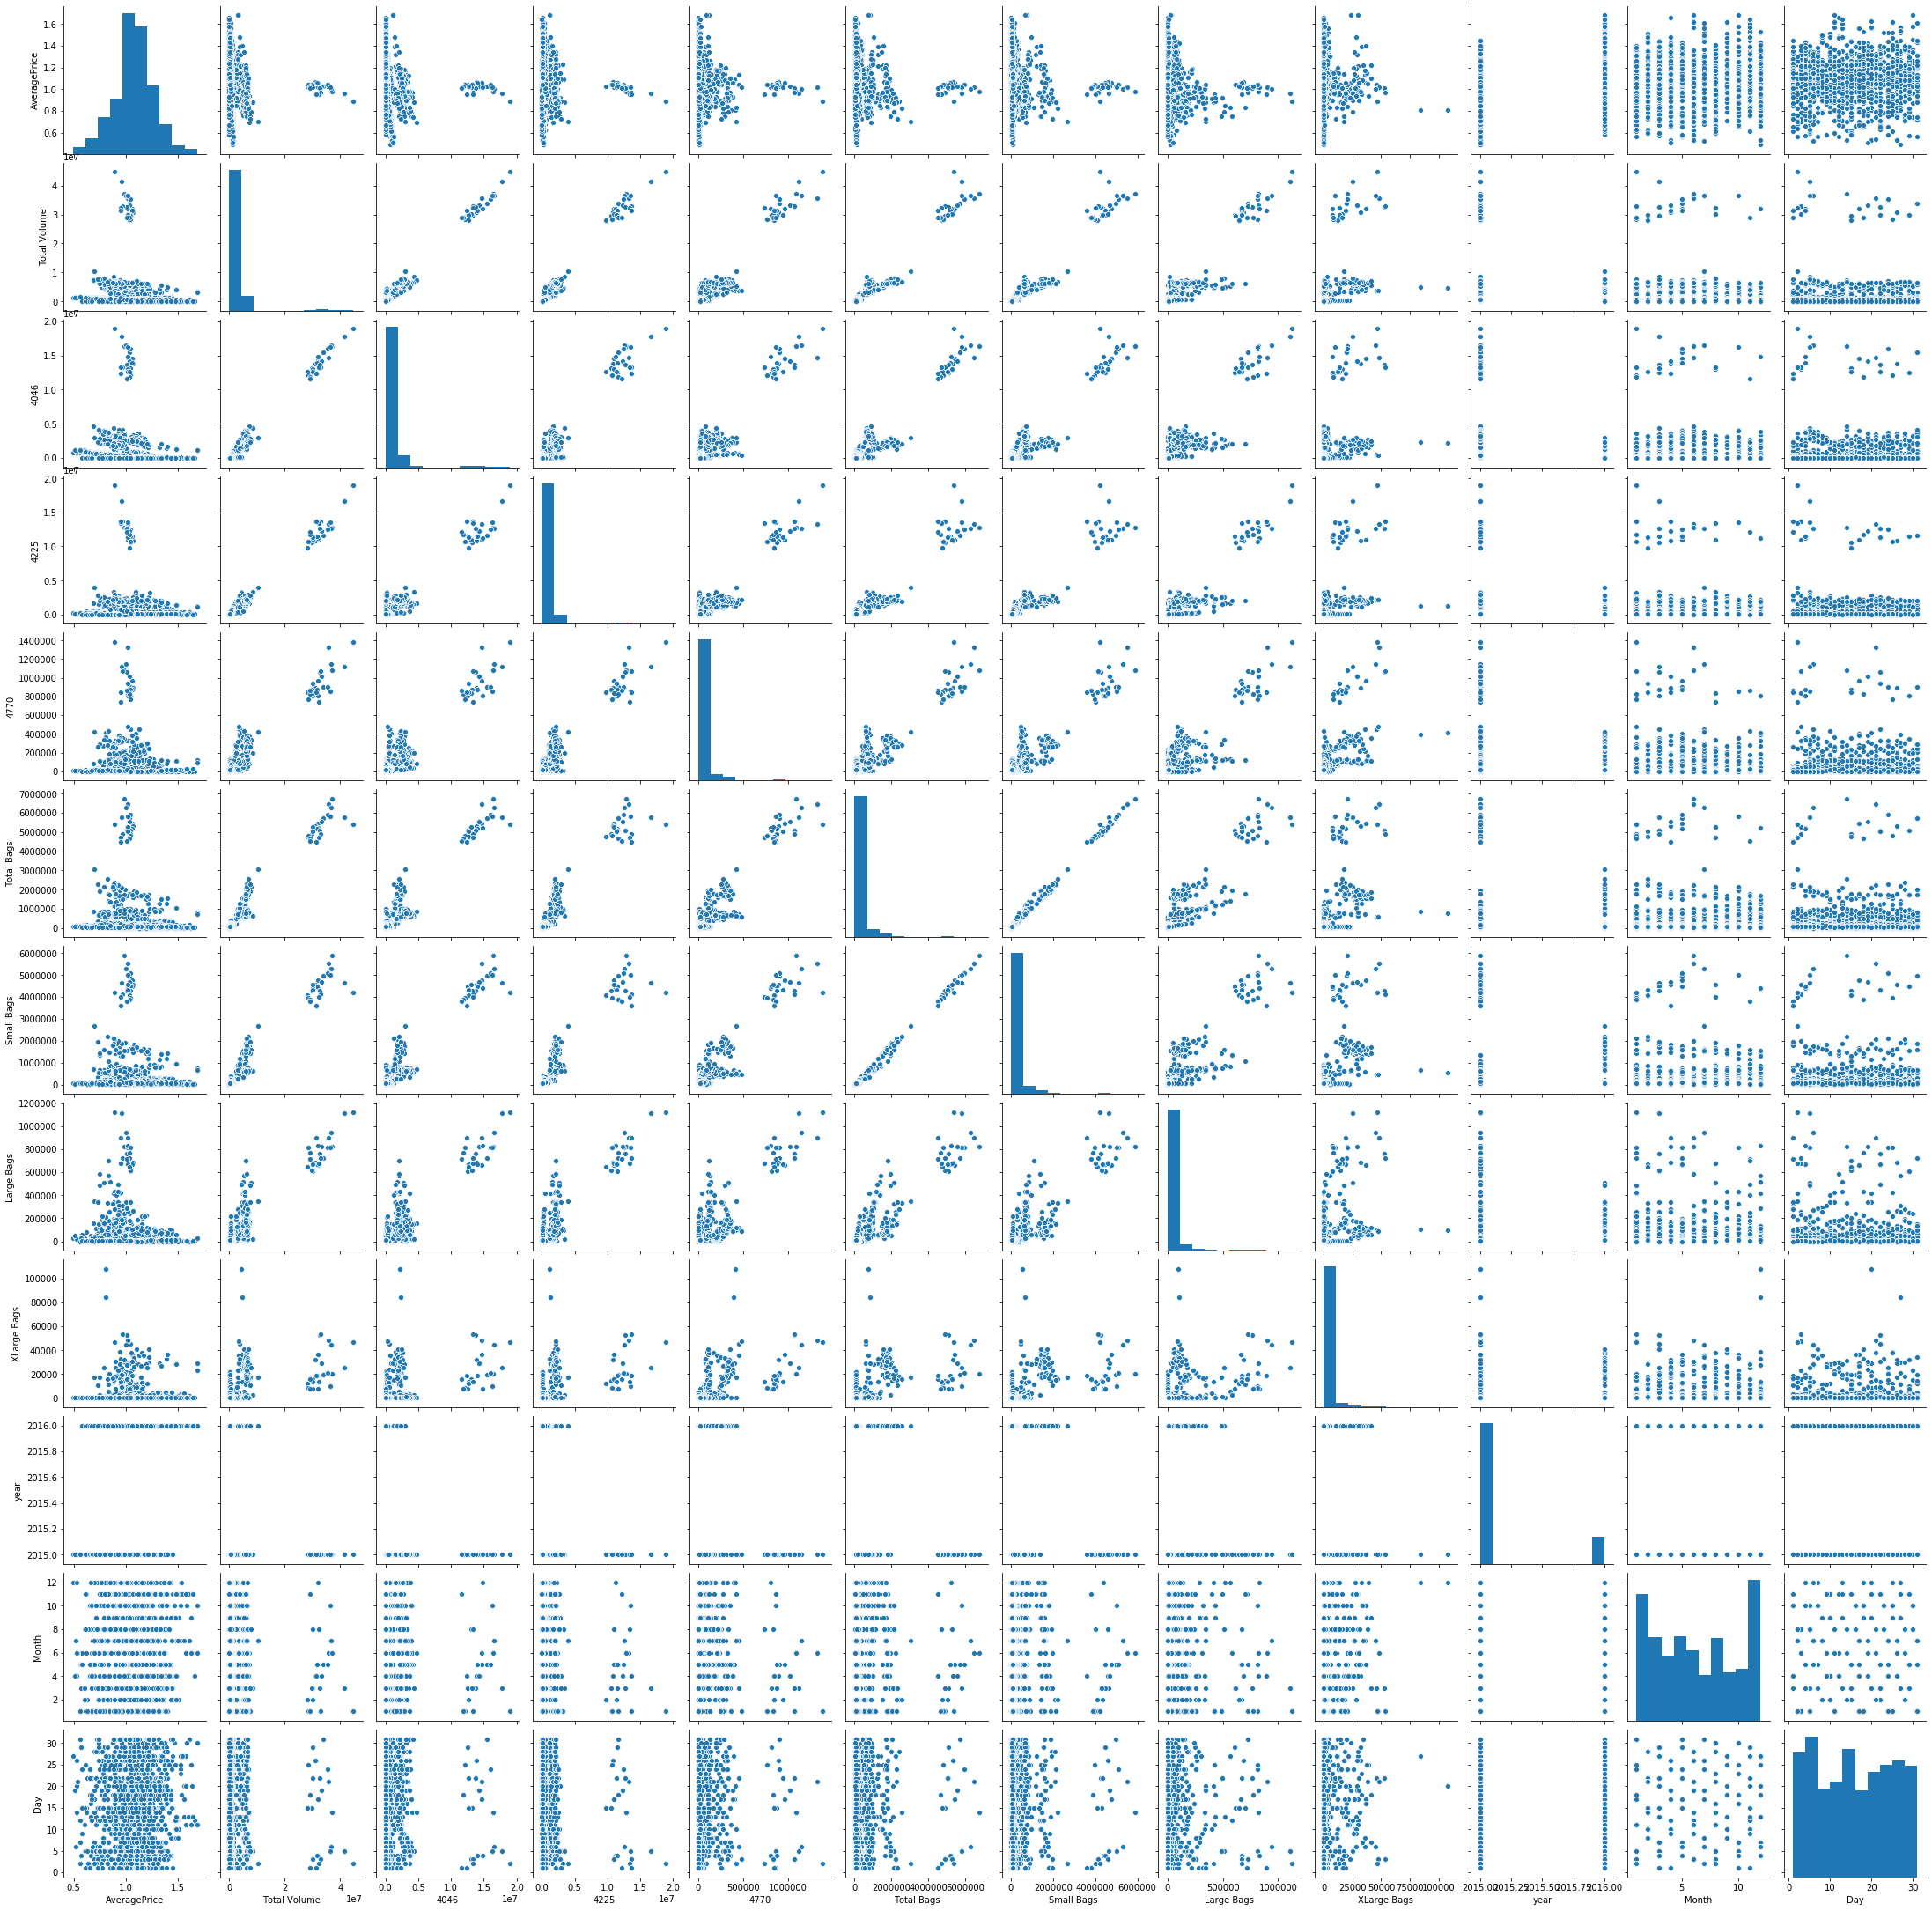

In [174]:
sns.pairplot(df)
plt.show()

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [175]:
#check data types 
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [176]:
new_df=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [177]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


# Model Selection for Part 1:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the the average price by developing a supervised machine learning model and we want to identify a relation between our output (AveragePrice) and remaining independent features . This scenario is a classic example of Regression (Predict the average price).

We are provided with 1517 rows of the labeled dataset tagged with the output column “AveragePrice” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Regression problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

DecisionTreeRegressor()

RandomForestRegressor()


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [178]:
y = new_df["AveragePrice"]
x = new_df.drop("AveragePrice",axis=1)


In [179]:
x.shape

(1517, 11)

In [180]:
y.shape

(1517,)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 40)


In [182]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 0.13277729768673138
mse 0.031085551135399007
rmse 0.17631095012902348
score 0.16141986989235235


error
mae 0.07302631578947368
mse 0.011361842105263158
rmse 0.10659194202782478
score 0.69349698870083


error
mae 0.05726096491228069
mse 0.005892049605263165
rmse 0.07675968737080138
score 0.8410529797891944




# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 16%

Accuracy score of DecisionTreeRegressor() is 65%

Accuracy score of RandomForestRegressor() is 84%

Hence we can say that out all algorithems RandomForestRegressor() is best for this problem till now however we will use cross validation to select best model.

In [183]:
lm =RandomForestRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [0.8262 1.1979 1.29   0.5809 1.1112 0.9962 1.2283 1.1382 1.0132 1.089
 0.9905 1.1468 1.0246 0.9975 1.3556 1.2248 0.8573 1.0117 1.2248 1.1153
 0.9926 1.1708 0.9433 1.1181 1.0947 1.1234 1.189  1.016  1.2892 1.1124
 1.0077 0.7451 1.0287 1.0689 0.7959 1.0303 1.2108 1.041  1.0914 1.1092
 1.2091 1.2611 1.2976 1.072  1.1845 1.0649 1.0635 1.056  1.0632 1.0839
 1.359  1.1077 0.7452 1.0999 1.157  1.0128 1.2857 1.0858 1.1719 1.1368
 0.8826 1.2184 0.7949 0.7585 1.124  1.1182 1.0185 1.0748 0.9977 0.7823
 1.1069 1.0355 0.9381 1.0154 0.7675 1.2979 1.0322 0.9701 0.9537 1.1075
 1.0496 1.1157 1.3517 1.22   1.2035 1.0553 0.673  1.037  1.0783 1.1944
 0.7275 1.153  1.2625 0.7736 1.0948 1.1682 1.088  1.0234 1.3672 1.0891
 1.5534 1.1533 1.1683 1.0474 1.0124 1.0599 1.0237 1.1164 1.1722 0.8967
 0.6368 1.0006 1.2171 1.0105 1.0954 1.0208 1.0609 1.1672 1.0473 0.7682
 1.0991 1.2451 1.0333 1.1276 1.0089 1.0826 1.1677 1.0154 1.2864 0.7762
 0.8215 1.2186 0.8077 0.8799 1.4089 1.0854 0.7714 0.9683 1.212

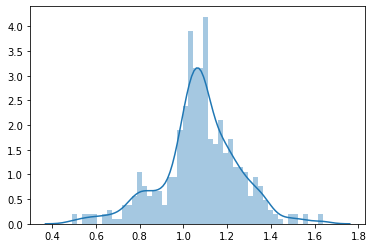

In [184]:
sns.distplot((y_test,pred),bins=50)

## Model Validation

In [185]:
clf = RandomForestRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores

array([0.06939127, 0.04007485, 0.59736948, 0.08014695, 0.29504279])

In [186]:
# number of features in X_train
x_train.shape

(1289, 11)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [187]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


#grid search
#specify model
lm = RandomForestRegressor()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'r2',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=RandomForestRegressor(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           criterion='mse',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
         

In [188]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.379888,1.509727,0.039097,0.008679,1,{'n_features_to_select': 1},0.087892,0.104033,-0.000572,0.137153,...,0.047584,0.082757,10,0.871184,0.864857,0.871412,0.865631,0.877494,0.870116,0.004583
1,9.855244,1.532154,0.020147,0.002984,2,{'n_features_to_select': 2},0.453443,0.581700,0.537771,0.592071,...,0.501196,0.093832,9,0.927570,0.933598,0.923432,0.928379,0.929258,0.928447,0.003260
2,10.671039,0.488282,0.037544,0.020073,3,{'n_features_to_select': 3},0.547757,0.655169,0.632871,0.712687,...,0.614356,0.069864,8,0.950452,0.946469,0.951415,0.950364,0.952818,0.950304,0.002111
3,9.193990,0.495731,0.024219,0.003057,4,{'n_features_to_select': 4},0.650882,0.737804,0.713654,0.764725,...,0.696957,0.054665,7,0.960366,0.953441,0.960832,0.955928,0.959993,0.958112,0.002919
4,8.690180,0.324760,0.030993,0.006239,5,{'n_features_to_select': 5},0.701770,0.776773,0.737763,0.783196,...,0.726773,0.054716,6,0.964493,0.958066,0.962023,0.960800,0.961700,0.961416,0.002075
5,7.295060,0.682448,0.027464,0.007396,6,{'n_features_to_select': 6},0.736028,0.772523,0.722911,0.803406,...,0.741450,0.044603,5,0.969742,0.960524,0.963546,0.961348,0.966178,0.964268,0.003367
6,6.387878,0.500405,0.024781,0.003103,7,{'n_features_to_select': 7},0.745393,0.790911,0.763880,0.818023,...,0.765071,0.037988,3,0.967949,0.964116,0.967795,0.964838,0.968365,0.966612,0.001768
7,5.943462,0.514999,0.025688,0.002373,8,{'n_features_to_select': 8},0.741839,0.787122,0.769088,0.812991,...,0.763922,0.036123,4,0.968205,0.963431,0.967954,0.963971,0.968802,0.966473,0.002286
8,5.321518,0.778612,0.029413,0.009122,9,{'n_features_to_select': 9},0.764923,0.783368,0.781148,0.823633,...,0.776226,0.030888,1,0.970815,0.962586,0.968467,0.967452,0.970758,0.968016,0.003012
9,3.009055,0.280607,0.025535,0.003666,10,{'n_features_to_select': 10},0.752162,0.794998,0.787792,0.813736,...,0.775154,0.031247,2,0.969862,0.965419,0.969190,0.966294,0.969005,0.967954,0.001758


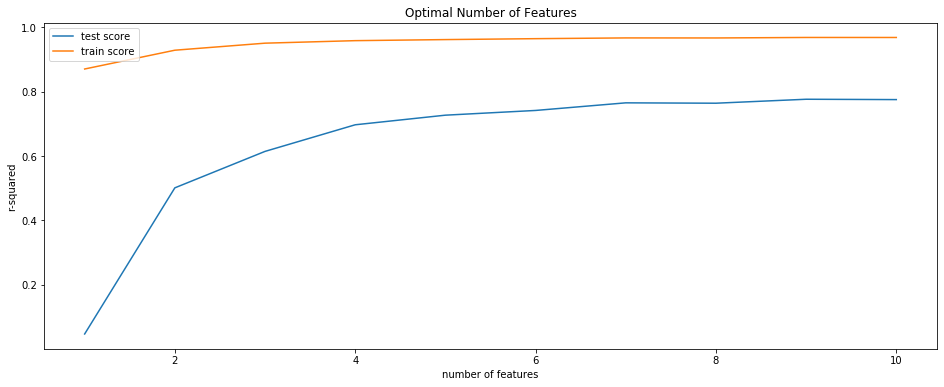

In [189]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [190]:
# final model
n_features_optimal = 6

lm =  RandomForestRegressor()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.836234207005178


# Save the model using Pickle

In [191]:
# Save the model using pickle
import pickle

filename = "pickleRFRfile.pkl"
pickle.dump(lm, open(filename, 'wb'))


# Conclusion of Part 1:
we achieved highest accuracy score of 90% by using Support Vectore Clasifier which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the number of wins a baseball team will attain.

# Part 2:-

In [199]:
new2_df=df.drop(['Date','type'],axis=1)

prepared new data for part 2

In [200]:
new2_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in all column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [201]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
new2_df['region'] = label.fit_transform(new2_df['region'].values)
new2_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


# Model Selection for Part 2:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the  the city/region of observation developing a supervised machine learning model and we want to identify a relation between our output (Region) and remaining independent features . This scenario is a classic example of classification (Predict the city).

We are provided with 1517 rows of the labeled dataset tagged with the output column “region” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Decision Tree

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [206]:
y = new2_df.region
x = new2_df.drop('region',axis=1)

In [207]:
x.shape

(1517, 12)

In [208]:
y.shape

(1517,)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [209]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [211]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.2894736842105263
[[0 0 1 ... 0 0 0]
 [0 2 0 ... 0 2 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.40      0.29      0.33         7
           2       0.53      1.00      0.69         9
           3       0.00      0.00      0.00        11
           4       0.50      0.20      0.29        10
           5       0.30      1.00      0.46         3
           6       0.08      0.50      0.13         6
           7       0.00      0.00      0.00         3
           8       0.40      1.00      0.57         2
           9       0.50      0.20      0.29         5
          10       0.00      0.00      0.00         2
          11       0.50      1.00      0.67         3
          12       0.36      1.00      0.53         5
          13       0.00      0.00      0.00         4
          14       0.50      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8070175438596491
[[8 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11
           4       0.82      0.90      0.86        10
           5       0.43      1.00      0.60         3
           6       0.44      0.67      0.53         6
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         5
          10       0.50      0.50      0.50         2
          11       0.43      1.00      0.60         3
          12       1.00      1.00      1.00         5
          13       0.00      0.00      0.00         4
          14       0.80      0.67      0.73       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  we can observe that Decision Tree Classifier() algorithem worked very well.

Accuracy score of all algorithems are as given:-

Accuracy score of Logistic Regression is 31%

Accuracy score of SVC is 19%

Accuracy score of Decision Tree Classifier is 81%

Accuracy score of K Neighbors Classifier is 80%

Hence we can say that out all algorithems Decision Tree Classifier and K Neighbors Classifier are working good for this problem till now. we Decision Tree Classifier to build our model.

# Model Validation

In [212]:
log=DecisionTreeClassifier()
log.fit(x_train,y_train)
log.score(x_train,y_train)
pred = log.predict(x_test)
print('accuaracy score of',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('\n')

accuaracy score of 0.881578947368421
[[8 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        10
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         6
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       1.00      0.80      0.89         5
          10       0.40      1.00      0.57         2
          11       1.00      1.00      1.00         3
          12       0.83      1.00      0.91         5
          13       1.00      0.25      0.40         4
          14       1.00      0.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
clf = DecisionTreeClassifier()

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.74013158, 0.85197368, 0.87788779, 0.82508251, 0.7689769 ])

In [229]:
# number of features in X_train
x_train.shape

(1289, 12)

In [230]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


#grid search
#specify model
lm = DecisionTreeClassifier()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
                                                            presort='depr

In [216]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.279629,0.023054,0.003717,0.002106,1,{'n_features_to_select': 1},-0.539710,-0.638533,-0.491045,-0.626123,...,-0.555695,0.065624,10,1.0,1.0,0.993363,1.0,0.993407,0.997354,0.003241
1,0.295961,0.047660,0.002903,0.002632,2,{'n_features_to_select': 2},0.154951,0.130867,0.074137,0.259561,...,0.162640,0.062062,9,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
2,0.265008,0.019276,0.003228,0.001739,3,{'n_features_to_select': 3},0.381433,0.635962,0.560667,0.608053,...,0.539275,0.089769,8,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
3,0.227120,0.018288,0.004641,0.000864,4,{'n_features_to_select': 4},0.753424,0.716937,0.722938,0.680130,...,0.717702,0.023335,7,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
4,0.221146,0.012730,0.002056,0.001263,5,{'n_features_to_select': 5},0.718872,0.800697,0.719542,0.744859,...,0.746173,0.029765,5,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
5,0.261365,0.052842,0.002871,0.002362,6,{'n_features_to_select': 6},0.735174,0.784962,0.677732,0.695888,...,0.748355,0.061947,3,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
6,0.191752,0.022111,0.004115,0.000792,7,{'n_features_to_select': 7},0.705546,0.796726,0.772934,0.643523,...,0.743255,0.060094,6,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
7,0.160712,0.015222,0.003747,0.002066,8,{'n_features_to_select': 8},0.766126,0.739711,0.822555,0.622583,...,0.756316,0.075051,1,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
8,0.123438,0.007444,0.002633,0.001378,9,{'n_features_to_select': 9},0.697306,0.763418,0.795919,0.671433,...,0.749907,0.057175,2,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000
9,0.106720,0.004993,0.003356,0.002403,10,{'n_features_to_select': 10},0.762512,0.767122,0.756338,0.612159,...,0.748326,0.075124,4,1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000


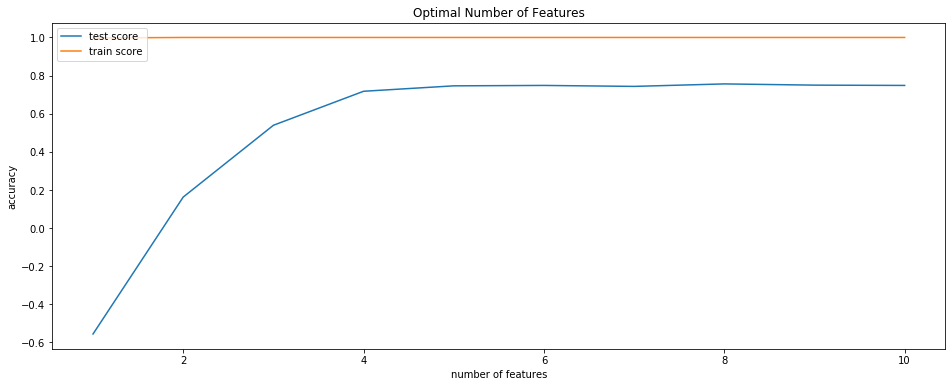

In [231]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [236]:
# final model
n_features_optimal = 7

lm =  DecisionTreeClassifier()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.8903508771929824


# Save the model using Pickle

In [237]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion of Part 2:
we achieved highest accuracy score of 87% by using Decision Tree Classifier which is good for any machine learning prediction model particularly for a classification problem. Finally! we successfully created a classification Machine Learning prediction model using Python and its powerful libraries which predicts the city of observation of the avocado.